# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0383 Зенин Пётр и Мария Ханина. Вариант №20.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Аналоговый сигнал** — сигнал, непрерывный по времени.

**Дискретный сигнал** – сингал, дискретный по времени и непрерывный по значению

**Спектр дискретного сигнала** - $S(\omega) = \sum\limits_{k=-\infty}^{\infty}x_ke^{i\omega k}$

**Дискретное преобразование Фурье** - $X(n) = \sum\limits_{k=0}^{N-1}x_k e^{-i\frac{2\pi n}{N}k}, \quad n=0,1,2,\dots,N-1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_kt + \phi_k)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi

In [90]:
def generate_signals():
    d_t = np.linspace(0,31,32)
    t = np.linspace(0,31,16384)
    omega = np.arange(0,1.1,0.1)*pi
    phi = np.random.random(size=11)/2
    A_k = np.random.randint(1,12,size=11) #Генерируются целые числа в диапазоне [1;12)
    A_k = A_k/np.sum(A_k)
    
    signal = []
    disc_signal = []
    
    for x in t:
        value = np.sum(A_k * np.cos(omega*x + phi))
        signal.append(value)
    
    for x in d_t:
        value = np.sum(A_k * np.cos(omega*x + phi))
        disc_signal.append(value)
    
    return (np.array(signal), np.array(disc_signal))

signal, disc_signal = generate_signals()

#### 2. Визуализировать исходные аналоговый и дискретизированный сигналы.

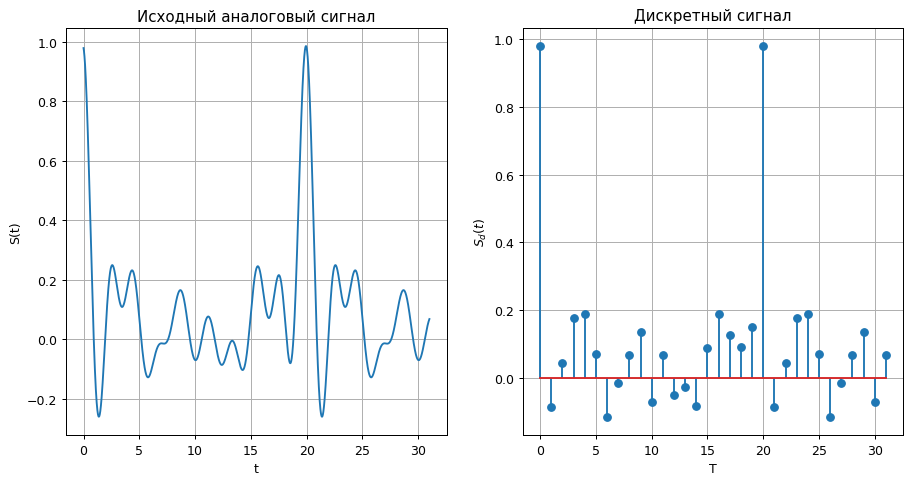

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6), dpi = 90)


ax1.plot(np.linspace(0,31,16384),signal)
ax1.set_title("Исходный аналоговый сигнал")
ax1.set_xlabel("t")
ax1.set_ylabel("S(t)")
ax1.grid()


ax2.stem(np.arange(0,32,1),disc_signal)
ax2.set_title("Дискретный сигнал")
ax2.set_xlabel("T")
ax2.set_ylabel(r"$S_d(t)$")
ax2.grid()
#fig.show()

#### 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

$X(n) = \sum\limits_{k=0}^{N-1} x_ke^{-i\frac{2\pi n}{N}k}, \quad n={0,1,2,\dots,N-1}$

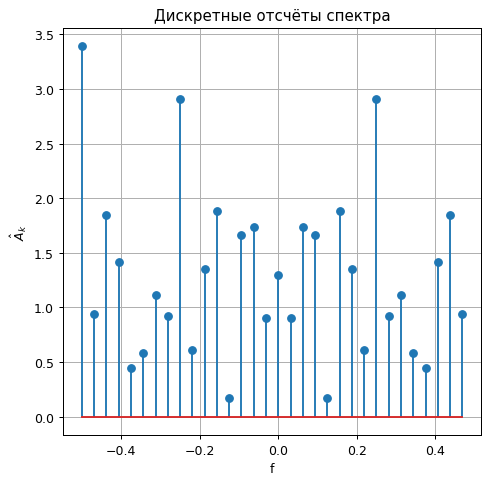

In [110]:
def DFT(x):
    N = 32
    spectre = []
    for n in range(0,N):
        spectre.append(np.sum(x*np.exp(np.arange(0,N,1)*2j * pi * n/N)))
    return np.array(np.abs(spectre))

plt.figure(figsize = (6,6), dpi = 90)
plt.stem(np.arange(-0.5,0.5,1/32), DFT(disc_signal))
plt.title("Дискретные отсчёты спектра")
plt.xlabel("f")
plt.ylabel(r"$\hat{A}_k$")
plt.grid()
plt.show()

Полученный спектр симметричен относительно нуля.

#### 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для  $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

**Сглаживание по пяти точкам:**

$y_{n=5} = \frac{1}{5}\sum\limits_{k=-2}^2 x_{n+k}$, 

$H(\omega) = \frac{1}{5}(1 + 2\cos(\omega) + 2\cos(2\omega))$

<br><br>

**Сглаживание по девяти точкам:**

$y_{n=9} = \frac{1}{9}\sum\limits_{k=-4}^4 x_{n+k}$, 

$H(\omega) = \frac{1}{9}(1 + 2\cos(\omega) + 2\cos(2\omega) + 2cos(3\omega) + 2cos(4\omega))$

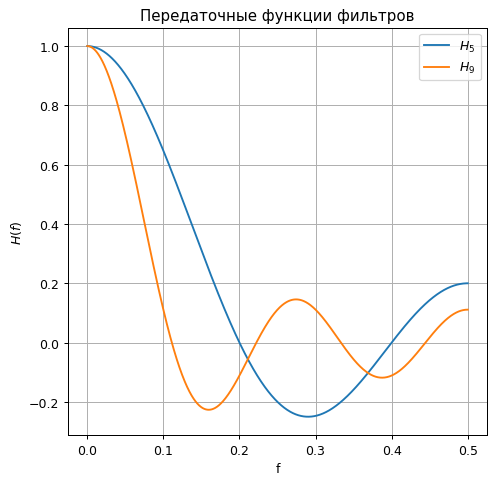

In [125]:
x = np.linspace(0,0.5,1000)*2
h5 = (1/5) * (1 + 2*np.cos(x*pi) + 2 * np.cos(2*x*pi))
h9 = (1/9) * (1 + 2*np.cos(x*pi) + 2 * np.cos(2*x*pi) + 2 * np.cos(3*x*pi) + 2 * np.cos(4*x*pi))

x = np.linspace(0,0.5,1000)
plt.figure(figsize = (6,6), dpi = 90)
plt.plot(x,h5, label = r"$H_5$")
plt.plot(x,h9, label = r"$H_9$")
plt.title("Передаточные функции фильтров")
plt.xlabel("f")
plt.ylabel(r"$H(f)$")
plt.legend()
plt.grid()
plt.show()

#### 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

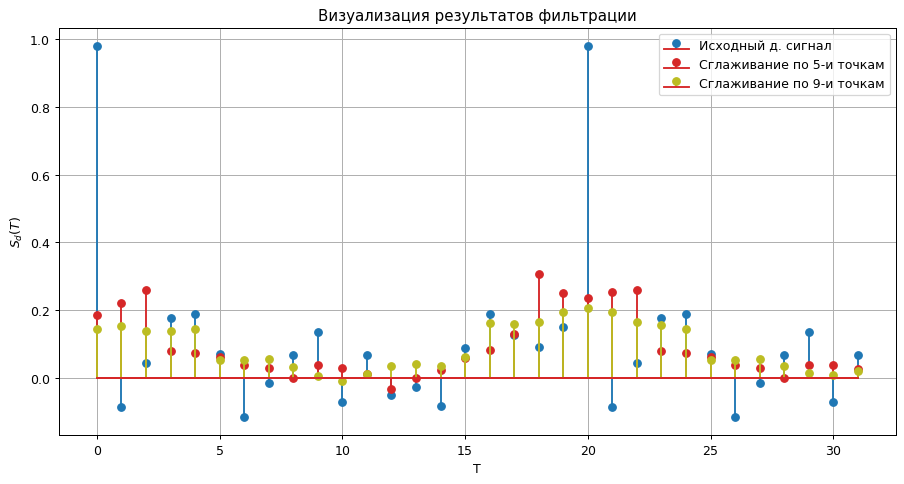

In [148]:
def filter_5(signal):
    return np.convolve(signal, np.ones(5)/5, mode = "same")

def filter_9(signal):
    return np.convolve(signal, np.ones(9)/9, mode = "same")

T = np.arange(0,32,1)

plt.figure(figsize=(12,6), dpi = 90)

plt.stem(T, disc_signal, label = "Исходный д. сигнал")
plt.stem(T, filter_5(disc_signal), label = "Сглаживание по 5-и точкам", linefmt="C3", markerfmt="C3o")
plt.stem(T, filter_9(disc_signal), label = "Сглаживание по 9-и точкам", linefmt="C8-", markerfmt="C8o")
plt.title("Визуализация результатов фильтрации")
plt.xlabel("T")
plt.ylabel(r"$S_d(T)$")
plt.legend()
plt.grid()
plt.show()

На графике можно заметить, что чем выше количество точек, по которым происходит сглаживание, тем меньше всплесков остаётся в сигнале (уменьшается влияние высокочастотных гармоник).

#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

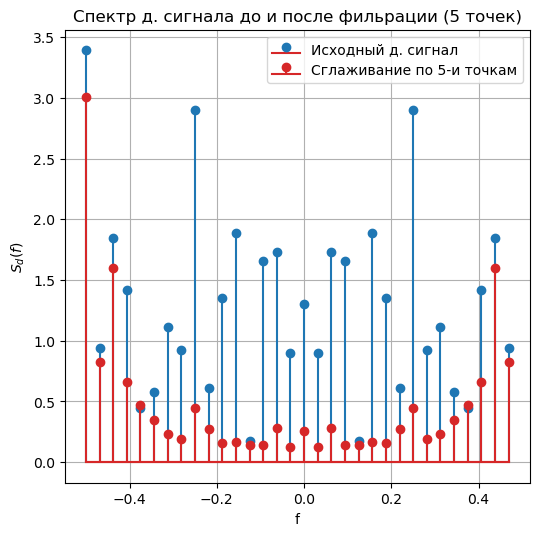

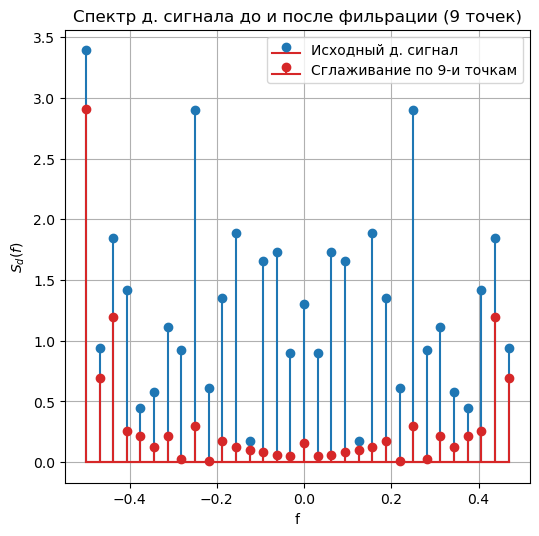

In [154]:
f = np.arange(-0.5,0.5,1/32)


plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(filter_5(disc_signal)), label = "Сглаживание по 5-и точкам", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (5 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(filter_9(disc_signal)), label = "Сглаживание по 9-и точкам", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (9 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

#### 7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Передаточные функции фильтров имееют значения $<1$ при $f > 0$. Это заметно на графиках спектров: амплитуды частот никогда не превосходят амплитуд частот исходного дискретного сигнала. Передаточная функция линейного фильтра сглаживания по 5-и точкам имеет меньшую куртизну спада, чем у фильтра сглаживания по 9-и точкам. Этот эффект виден и на найденных спектрах. В значениях $f \in [0.1, 0.2] \cup [0.4, 0.5]$ видно, что амлитуда частот в этом интервале уменьшается с увеличением количества точек, по которым происходит сгалживание. 

#### 8. Повторить п. 4–7 для следующих фильтров: 
a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам

#### Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

**Сглаживание по пяти точкам:**

$y_{n=5} = \frac{1}{35}(-3x_{n-2} + 12x_{n-1} + 17x_n + 12x_{n+1} - 3x_{n+2})$, 

$H(\omega) = \frac{1}{35}(17 + 24\cos(\omega) - 6\cos(2\omega))$

<br><br>

**Сглаживание по девяти точкам:**

$y_{n=9} = \frac{1}{231}(-21x_{n-4} + 14x_{n-3} + 39x_{n-2} + 54x_{n-1} + 59x_n + 54x_{n+1} + 39x_{n+2} + 14x_{n+3} - 21x_{n+4})$, 

$H(\omega) = \frac{1}{231}(59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega))$


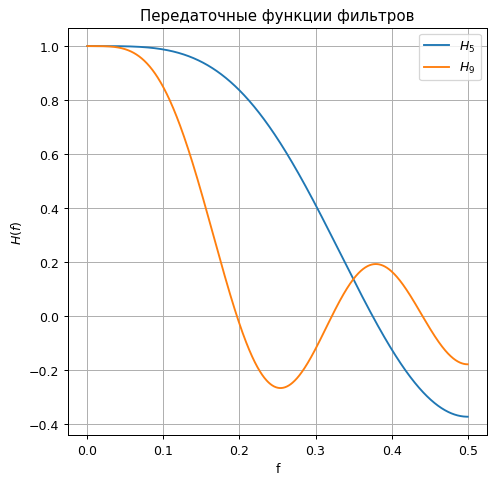

In [156]:
x = np.linspace(0,0.5,1000)*2
h5 = (1/35) * (17 + 24*np.cos(x*pi) - 6 * np.cos(2*x*pi))
h9 = (1/231) * (59 + 108*np.cos(x*pi) + 78 * np.cos(2*x*pi) + 28 * np.cos(3*x*pi) - 42 * np.cos(4*x*pi))

x = np.linspace(0,0.5,1000)
plt.figure(figsize = (6,6), dpi = 90)
plt.plot(x,h5, label = r"$H_5$")
plt.plot(x,h9, label = r"$H_9$")
plt.title("Передаточные функции фильтров")
plt.xlabel("f")
plt.ylabel(r"$H(f)$")
plt.legend()
plt.grid()
plt.show()

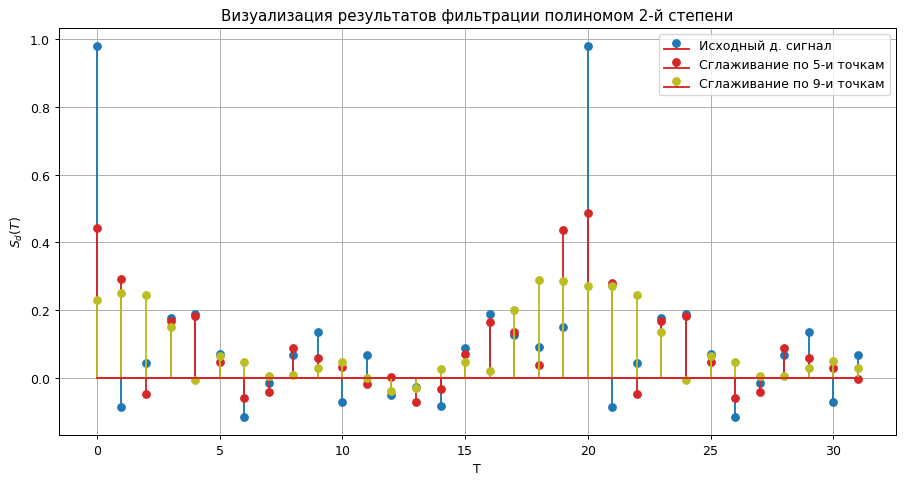

In [158]:
def quad_filter_5(signal):
    return np.convolve(signal, np.array([-3, 12, 17, 12, -3])/35, 'same')

def quad_filter_9(signal):
    return np.convolve(signal, np.array([-21, 14, 39, 54, 59, 54, 39, 14, - 21])/231, 'same')

T = np.arange(0,32,1)

plt.figure(figsize=(12,6), dpi = 90)

plt.stem(T, disc_signal, label = "Исходный д. сигнал")
plt.stem(T, quad_filter_5(disc_signal), label = "Сглаживание по 5-и точкам", linefmt="C3", markerfmt="C3o")
plt.stem(T, quad_filter_9(disc_signal), label = "Сглаживание по 9-и точкам", linefmt="C8-", markerfmt="C8o")
plt.title("Визуализация результатов фильтрации полиномом 2-й степени")
plt.xlabel("T")
plt.ylabel(r"$S_d(T)$")
plt.legend()
plt.grid()
plt.show()

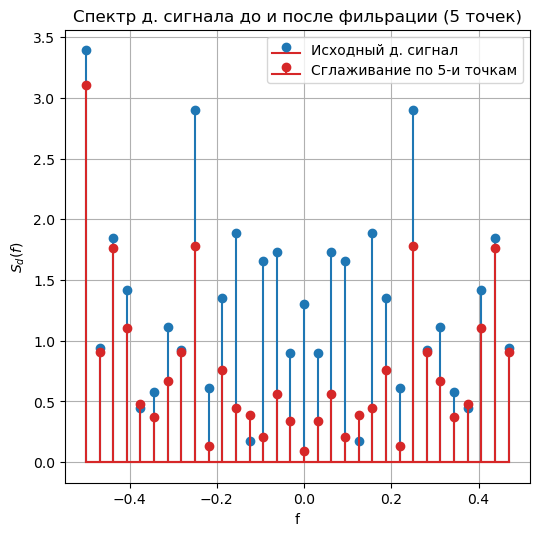

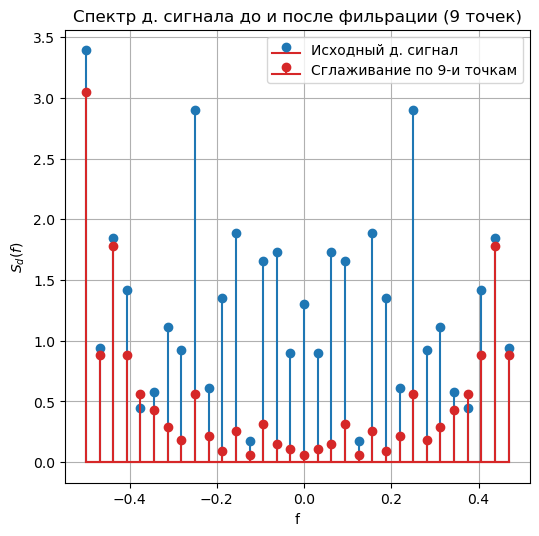

In [159]:
f = np.arange(-0.5,0.5,1/32)


plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(quad_filter_5(disc_signal)), label = "Сглаживание по 5-и точкам", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (5 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(quad_filter_9(disc_signal)), label = "Сглаживание по 9-и точкам", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (9 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

Фильтры сглаживания, использующие полиномы второй степени, лучше пропускают низкие частоты спектра, чем фильтр, использующий линейные функции. Это лучше всего заметно на спектре сигнала после сглаживания по 5-и точкам. Частоты, близкие к нулю, имеют большую амплитуду при использовании полинома второй степени, что соответствует передаточной функции, которая, по сравнению с линейным фильтром сглаживания, имеет меньшую крутизну спада и, соответственно, имеет большую полосу пропускания. Эти же наблюдения характерны и для фильтра, использующего сглаживание по 9-и точкам.

___________

#### Сглаживание полиномом 4-ой степени по 7 и 11 узлам

**Сглаживание по семи точкам:**

$y_{n=7} = \frac{1}{231}(5x_{n-3} -30x_{n-2} + 75x_{n-1} + 131x_n + 65x_{n+1} - 30x_{n+2} + 5x_{n+3})$, 

$H(\omega) = \frac{1}{231}(131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega))$

<br><br>

**Сглаживание по одинадцати точкам:**

$y_{n=11} = \frac{1}{429}(18x_{n-5} -45x_{n-4} - 10x_{n-3} + 60x_{n-2} + 120x_{n-1} + 143x_n + 120x_{n+1} + 60x_{n+2} + 10x_{n+3} - 45x_{n+4} + 18x_{n+5})$, 

$H(\omega) = \frac{1}{429}(143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega))$

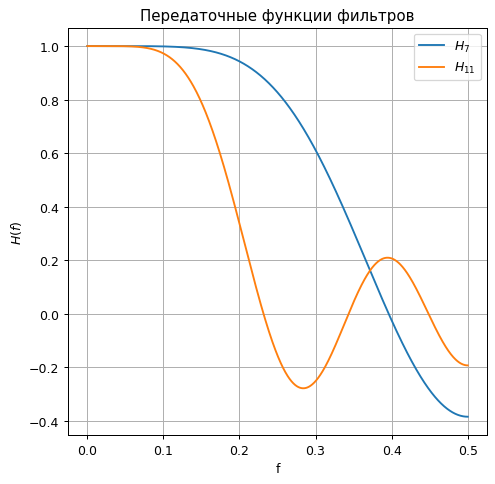

In [162]:
x = np.linspace(0,0.5,1000)*2
h7 = (1/231) * (131 + 150*np.cos(x*pi) - 60 * np.cos(2*x*pi) + 10 * np.cos(3*x*pi))
h11 = (1/429) * (143 + 240*np.cos(x*pi) + 120 * np.cos(2*x*pi) - 20 * np.cos(3*x*pi) - 90 * np.cos(4*x*pi) + 36 * np.cos(5*x*pi))

x = np.linspace(0,0.5,1000)
plt.figure(figsize = (6,6), dpi = 90)
plt.plot(x,h7, label = r"$H_7$")
plt.plot(x,h11, label = r"$H_{11}$")
plt.title("Передаточные функции фильтров")
plt.xlabel("f")
plt.ylabel(r"$H(f)$")
plt.legend()
plt.grid()
plt.show()

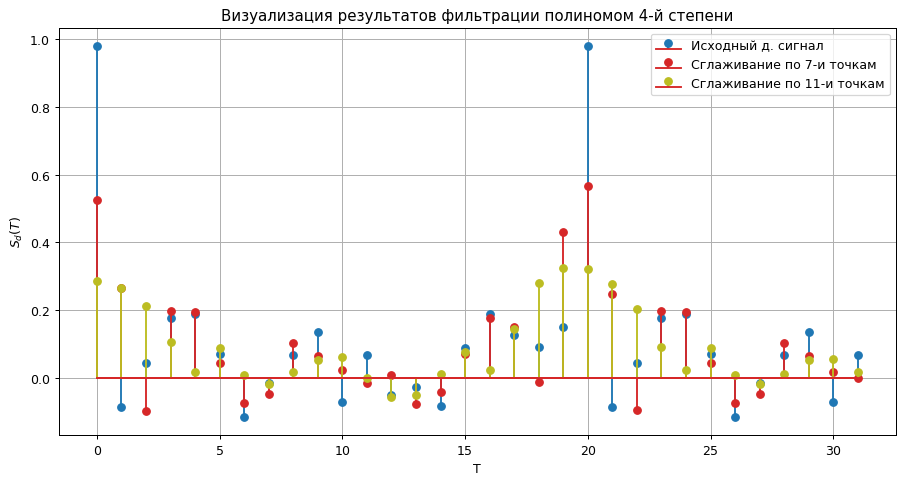

In [163]:
def qt_filter_7(signal):
    return np.convolve(signal, np.array([5, -30, 75, 131, 75, -30, 5])/231, 'same')

def qt_filter_11(signal):
    return np.convolve(signal, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13])/429, 'same')

T = np.arange(0,32,1)

plt.figure(figsize=(12,6), dpi = 90)

plt.stem(T, disc_signal, label = "Исходный д. сигнал")
plt.stem(T, qt_filter_7(disc_signal), label = "Сглаживание по 7-и точкам", linefmt="C3", markerfmt="C3o")
plt.stem(T, qt_filter_11(disc_signal), label = "Сглаживание по 11-и точкам", linefmt="C8-", markerfmt="C8o")
plt.title("Визуализация результатов фильтрации полиномом 4-й степени")
plt.xlabel("T")
plt.ylabel(r"$S_d(T)$")
plt.legend()
plt.grid()
plt.show()

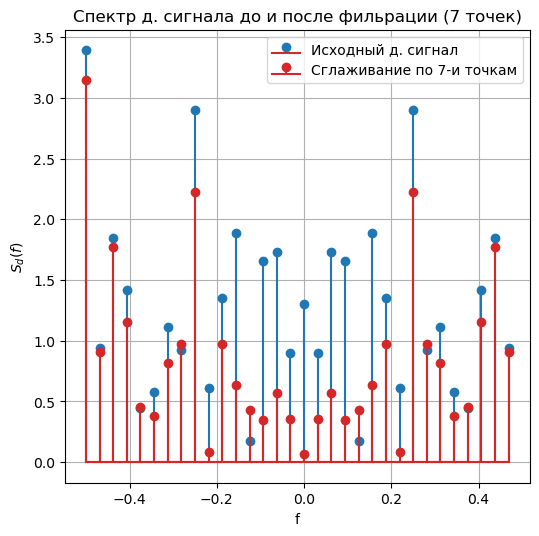

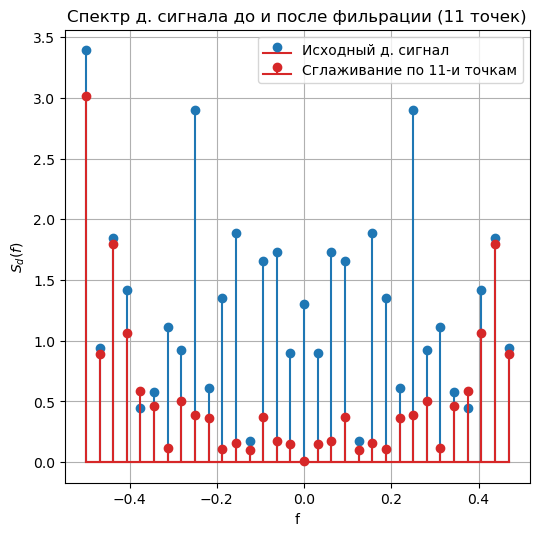

In [165]:
f = np.arange(-0.5,0.5,1/32)


plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(qt_filter_7(disc_signal)), label = "Сглаживание по 7-и точкам", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (7 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(qt_filter_11(disc_signal)), label = "Сглаживание по 11-и точкам", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (11 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

Наблюдается тенденция к увеличению полосы пропускания при увеличении степени полниомов при фильтрации. Фильтр, использующий полиномы 4 степени, сохраняюет ещё больше низких частот, чем фильтр второй степени и линейный фильтр. Эти наблюдения сходятся с видом передаточной функцией фильтра сглаживания полиномом 4-й степени: низкая крутизна передаточной функции при значениях, близких к нулю.

## Выводы

В данной работе был сгенерирован дискретный сигнал на основе аналогового, над которым в дальнейшем были произведены операции дискретного преобразования фурье и сглаживания различной конфигурации. Были наглядно показаны эффекты применения различных сглаживающих фильтров на спектр сигнала. Были проанализированы сходства полученных спектров с найденными передаточными функциями фильтров. Было выполнено сравение сглаживающих фильтров, использующих полиномы степени 1, 2 и 4, и продемонстрировано различие в полосе пропускания как теоретически (при помощи передаточных функций), так и практически (при помощи нахождения спектра сглаженного сигнала дискретным преобразованием Фурье).